In [1]:
from bs4 import BeautifulSoup
import requests

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep

import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib
from matplotlib import rcParams
matplotlib.use('tkAgg', force=True)
from matplotlib.lines import Line2D

import seaborn as sns
import collections

import pandas as pd
import numpy as np
import os
    
from scipy.ndimage import gaussian_filter
import plotly.express as px

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use('seaborn-poster')

In [2]:
#font_manager.fontManager.ttflist

In [3]:
base_url = 'https://beta7.app/'

In [4]:
grade_colors = collections.OrderedDict()

grade_colors['3'] = '#ffff80'
grade_colors['4'] = '#fcff33'
grade_colors['5'] = '#8fff94'
grade_colors['5+'] = '#006432'
grade_colors['5C'] = '#037d50'
grade_colors['6A'] = '#9df7f2'
grade_colors['6A+'] = '#1cacb2'
grade_colors['6B'] = '#207ea7'
grade_colors['6B+'] = '#b58de8'
grade_colors['6C'] = '#9a57a2'
grade_colors['6C+'] = '#9a23a8'
grade_colors['7A'] = '#909090'
grade_colors['7A+'] = '#616161'
grade_colors['7B'] = '#424141'
grade_colors['7B+'] = '#303030'
grade_colors['7C'] = '#000000'
grade_colors['7C+'] = '#000000'
grade_colors['8A'] = '#000000'

#grade_color_list = list(grade_colors.values())

# ### Beta7 grade colors - hard to distinguish:
# grade_colors['4'] = '#e8da00'
# grade_colors['5'] = '#00a476'
# grade_colors['6A'] = '#199a92'
# grade_colors['6A+'] = '#008db2'
# grade_colors['6B'] = '#1684ae'
# grade_colors['6B+'] = '#6d5e9c'
# grade_colors['6C'] = '#835498'
# grade_colors['6C+'] = '#914e95'
# grade_colors['7A'] = '#453152'
# grade_colors['7A+'] = '#382a44'
# grade_colors['7B'] = '#282132'
# grade_colors['7B+'] = '#12151a'
# grade_colors['7C'] = '#36101f'

#### Selenium - get all routes

In [5]:
# driver = webdriver.Firefox()

# # Go to routes page:
# driver.get(base_url + "location/bertablock/routes")
# sleep(3)

# # load more than 16 routes:
# driver.find_element("xpath", "//span[.='load more']").click()
# sleep(4)

# # scrall down:
# for i in range(60):
#     driver.execute_script("window.scrollTo(0, 50000)") 
#     sleep(0.5)

In [6]:
# # get the entire html of the routes page
# html = driver.page_source
# # close the driver 
# driver.close()

In [7]:
# # format the html to soup
# soup = BeautifulSoup(html, 'html.parser')

#### Create all routes df:
Number of sends might be different here and in route link below (as people might send in the meanwhile)

In [8]:
# all_routes_soup = soup.find_all('div', {'class':'route-container'})
# n_routes = len(all_routes_soup)
# n_routes

In [9]:
# routes_section = []
# routes_color = []
# routes_name = []
# routes_grade = []
# routes_grade_gym = []
# routes_holdtypes = []
# routes_style = []
# routes_time = []
# routes_nclimbs = []

# # Get routes link:
# routes_hrefs = [a['href'] for a in soup.find_all('a', href=True) if 'route/' in a['href']]
# if len(routes_hrefs)!=n_routes:
#     print('mismatch in #route links to #links')

# for r_soup in all_routes_soup:
#     routes_section.append(r_soup.find('span', {'class':"additional-location-information"}).text)
#     routes_color.append(r_soup.find_all('span', {'class':"color"})[-1].text)
#     routes_holdtypes.append(r_soup.find('span', {'class':"holdtypes"}).text)
#     routes_style.append([s.text.replace('\u200d','') for s in r_soup.find_all('span', {'class':"style"})])
#     routes_time.append(r_soup.find('time', {'class':"hint"}).text)

#     name = r_soup.find('span', {'class':"route-name"})
#     name = name.text if name else ''
#     routes_name.append(name)
    
#     grade = r_soup.find('span', {'class':"grades"}).text.split('/')
#     routes_grade.append(grade[0])
#     routes_grade_gym.append(grade[1])
    
#     n_climbs = r_soup.find_all('span', {'class':"climbs-count"})
#     ## "climbs-count" might be senders/beta requests/videos
#     ## if isnumeric returns false than its the number of beta requests/videos.
#     n_climbs = float(n_climbs[-1].text.rstrip()) if (
#         n_climbs and n_climbs[-1].text.rstrip().isnumeric()) else float('nan')

#     routes_nclimbs.append(n_climbs)

    

In [10]:
# df_all_routes = pd.DataFrame({
#     'section':routes_section,
#     'grade':routes_grade,
#     'grade_gym':routes_grade_gym,
#     'color':routes_color,
#     'name':routes_name,
#     'holdtypes':routes_holdtypes,
#     'styles':routes_style,
#     'time':routes_time,
#     'href':routes_hrefs,
#     'nclimbs':routes_nclimbs,
# })

In [11]:
date = '220923'

In [12]:
# df_all_routes.to_csv('{date}_all_routes.csv')

In [13]:
df_all_routes = pd.read_csv(f'{date}_all_routes.csv', index_col=0)

In [14]:
holdtypes = ["pockets","jugs","volumes","pinches","crimps","slopers"]

for h in holdtypes:
    df_all_routes[h] = df_all_routes.holdtypes.str.contains(h)


In [15]:
styles = {"💎":"compression",
          "🔬":"technique",
          "💪":"strength",
          "💣":"power",
          "🤸":"fun",
          "🧘":"balance",
          "💢":"corner",
          "💃":"footwork",
          "🤹":"coordination",
          "🚪":"arete",
          "🏄":"mantle",
          "🚀":"dyno",
          "🔥":"endurance"
         }

for key,val in styles.items():
    df_all_routes[val] = df_all_routes.apply(lambda x: key in x['styles'], axis=1)



In [16]:
df_all_routes.head()

section grade grade_gym    color name                  holdtypes  \
0   Karma    7A   SCHWARZ    pink   NaN  crimps, pinches & slopers   
1   Karma    6C      LILA   black   NaN           slopers & crimps   
2   Karma    6A      BLAU    blue   NaN             jugs & pinches   
3   Karma     4      GELB  orange   NaN                     crimps   
4   Karma    5+      GRÜN  yellow   NaN                    slopers   

            styles        time  \
0  ['💎', '🔬', '💪']  3 days ago   
1       ['💣', '💎']  3 days ago   
2       ['🤸', '💣']  3 days ago   
3       ['🧘', '💪']  3 days ago   
4       ['🧘', '💢']  3 days ago   

                                                href  nclimbs  ...  power  \
0  /route/oPyelLHG1UTKGwdDHcqJ1OIzt383~1663690212790      2.0  ...  False   
1  /route/oPyelLHG1UTKGwdDHcqJ1OIzt383~1663690057778     15.0  ...   True   
2  /route/oPyelLHG1UTKGwdDHcqJ1OIzt383~1663689956983     63.0  ...   True   
3  /route/oPyelLHG1UTKGwdDHcqJ1OIzt383~1663689818869      8.0  ...  False   
4  /route/oPyelLHG1UTKGwdDHcqJ1OIzt383~1663689750330     11.0  ...  False   

     fun  balance  corner  footwork  coordination  arete  mantle   dyno  \
0  False    False   False     False         False  False   False  False   
1  False    False   False     False         False  False   False  False   
2   True    False   False     False         False  False   False  False   
3  False     True   False     False         False  False   False  False   
4  False     True    True     False         False  False   False  False   

   endurance  
0      False  
1      False  
2      False  
3      False  
4      False  

[5 rows x 29 columns]

### Summarize

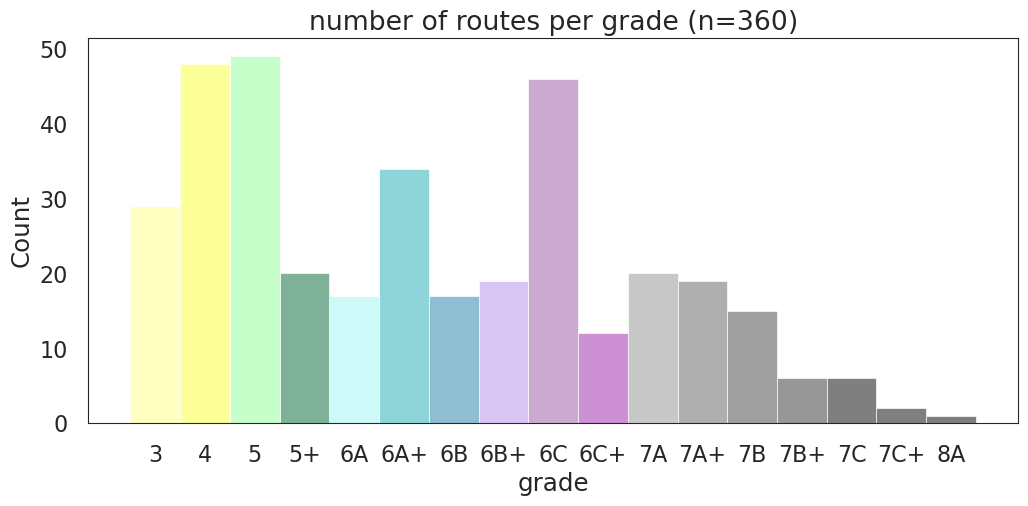

In [17]:
sns.set_style("white")
plt.figure(figsize=(12,5))
sns.histplot(df_all_routes.sort_values(by=["grade"]), x='grade', hue="grade", 
             palette=grade_colors).set(title=f'number of routes per grade (n={df_all_routes.shape[0]})')

plt.legend([],[], frameon=False)

plt.savefig(f'{date}_nRoutes_per_grade.png')

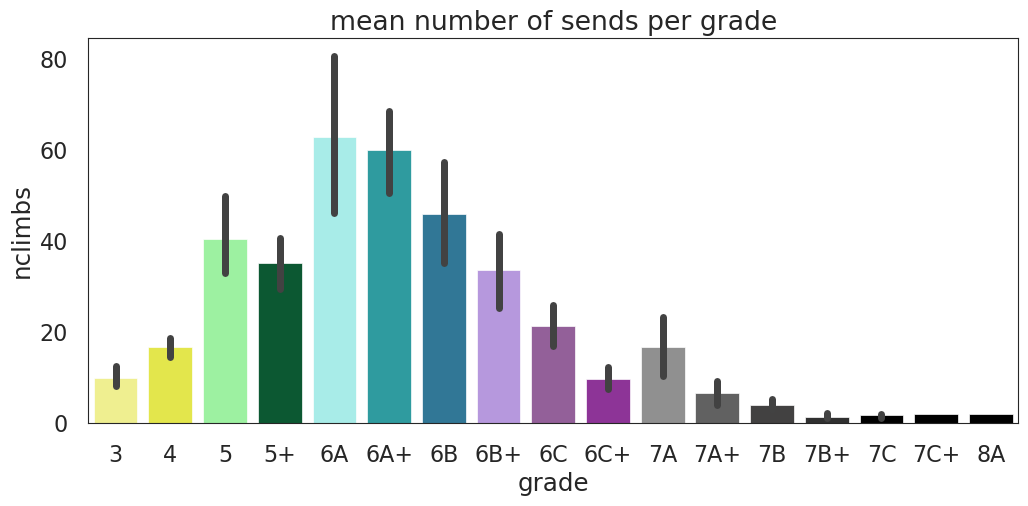

In [20]:
plt.figure(figsize=(12,5))

sns.barplot(data=df_all_routes.sort_values(by=["grade"]), x='grade', y='nclimbs', 
            palette=grade_colors).set(title='mean number of sends per grade')

plt.savefig(f'{date}_mean_nSends_per_grade.png')

In [21]:
df_grade_holdtype = df_all_routes.groupby(['grade'])[holdtypes].sum()
df_grade_holdtype['counter'] = df_all_routes.groupby(['grade']).size()

df_grade_holdtype = df_grade_holdtype.reset_index()

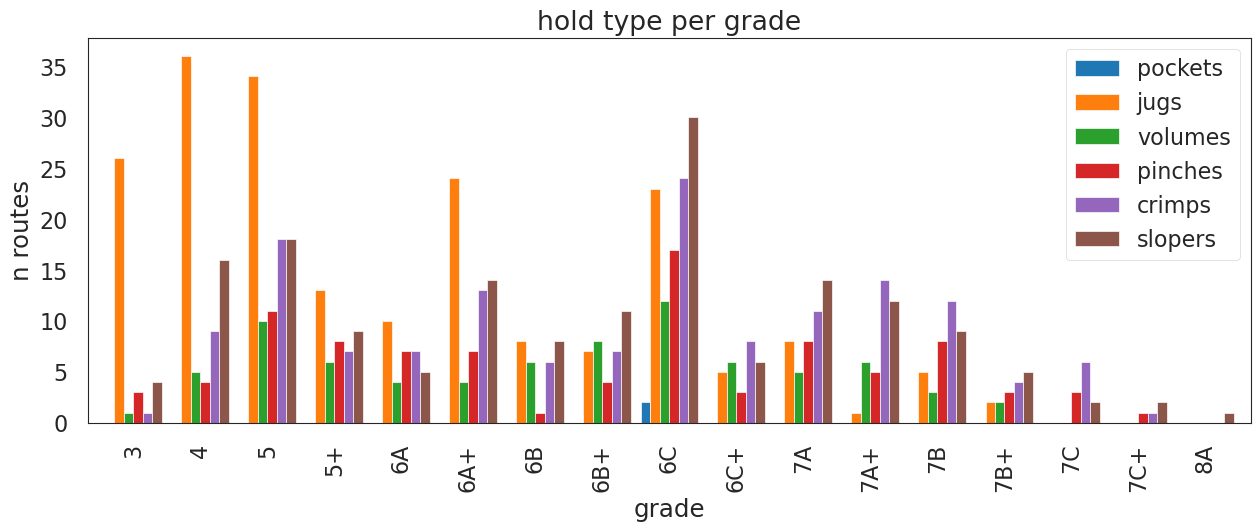

In [22]:
ax = df_grade_holdtype.plot(x="grade", y=holdtypes, width=0.85,
                       kind="bar",figsize=(15,5), title='hold type per grade')

ax.set_ylabel("n routes")

plt.savefig(f'{date}_holdType_per_grade.png')

In [23]:
df_grade_holdtype.iloc[:,1:-1] = df_grade_holdtype.iloc[:,1:-1].div(df_grade_holdtype.counter, axis=0)

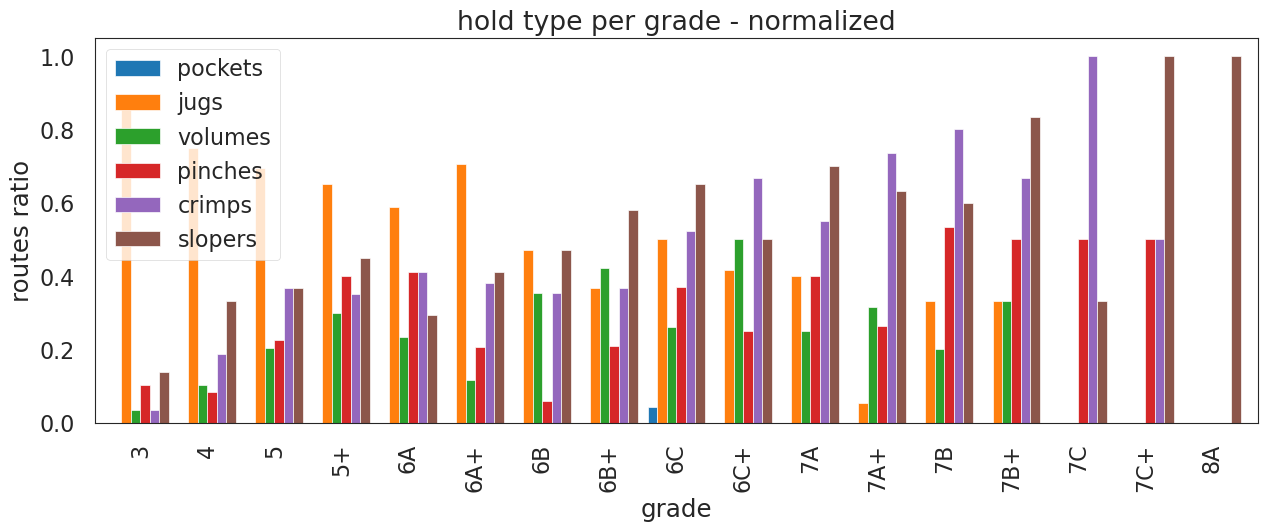

In [24]:
ax = df_grade_holdtype.plot(x="grade", y=holdtypes, 
                       kind="bar",figsize=(15,5), width=0.85, title='hold type per grade - normalized')

ax.set_ylabel("routes ratio")

plt.savefig(f'{date}_holdType_per_grade_normalized.png')

In [25]:
my_colors = [
'black',
'aqua', 
'blueviolet',
'brown',
'darkgray',
'darkgreen',
'cornflowerblue',
'blue',
'fuchsia',
'green',
'greenyellow',
'orange',
'red']

In [26]:
styles.values()

dict_values(['compression', 'technique', 'strength', 'power', 'fun', 'balance', 'corner', 'footwork', 'coordination', 'arete', 'mantle', 'dyno', 'endurance'])

In [27]:
df_grade_style = df_all_routes.groupby(['grade'])[list(styles.values())].sum()
df_grade_style['counter'] = df_all_routes.groupby(['grade']).size()

df_grade_style = df_grade_style.reset_index()

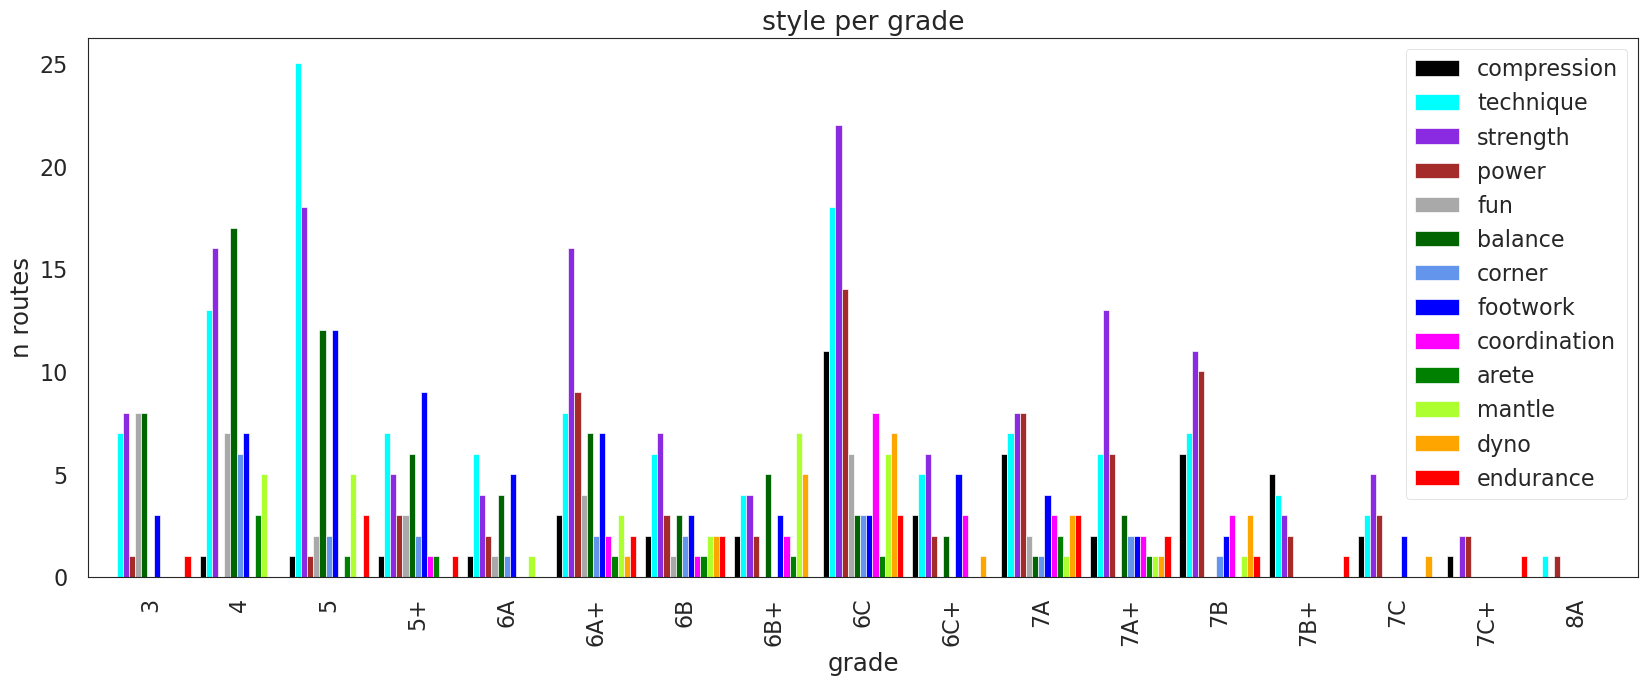

In [28]:
ax = df_grade_style.plot(x="grade", y=list(styles.values()), kind="bar", width=0.9, 
                         figsize=(20,7), title='style per grade', color=my_colors)

ax.set_ylabel("n routes")


plt.savefig(f'{date}_style_per_grade.png')

In [29]:
df_grade_style.iloc[:,1:-1] = df_grade_style.iloc[:,1:-1].div(df_grade_style.counter, axis=0)

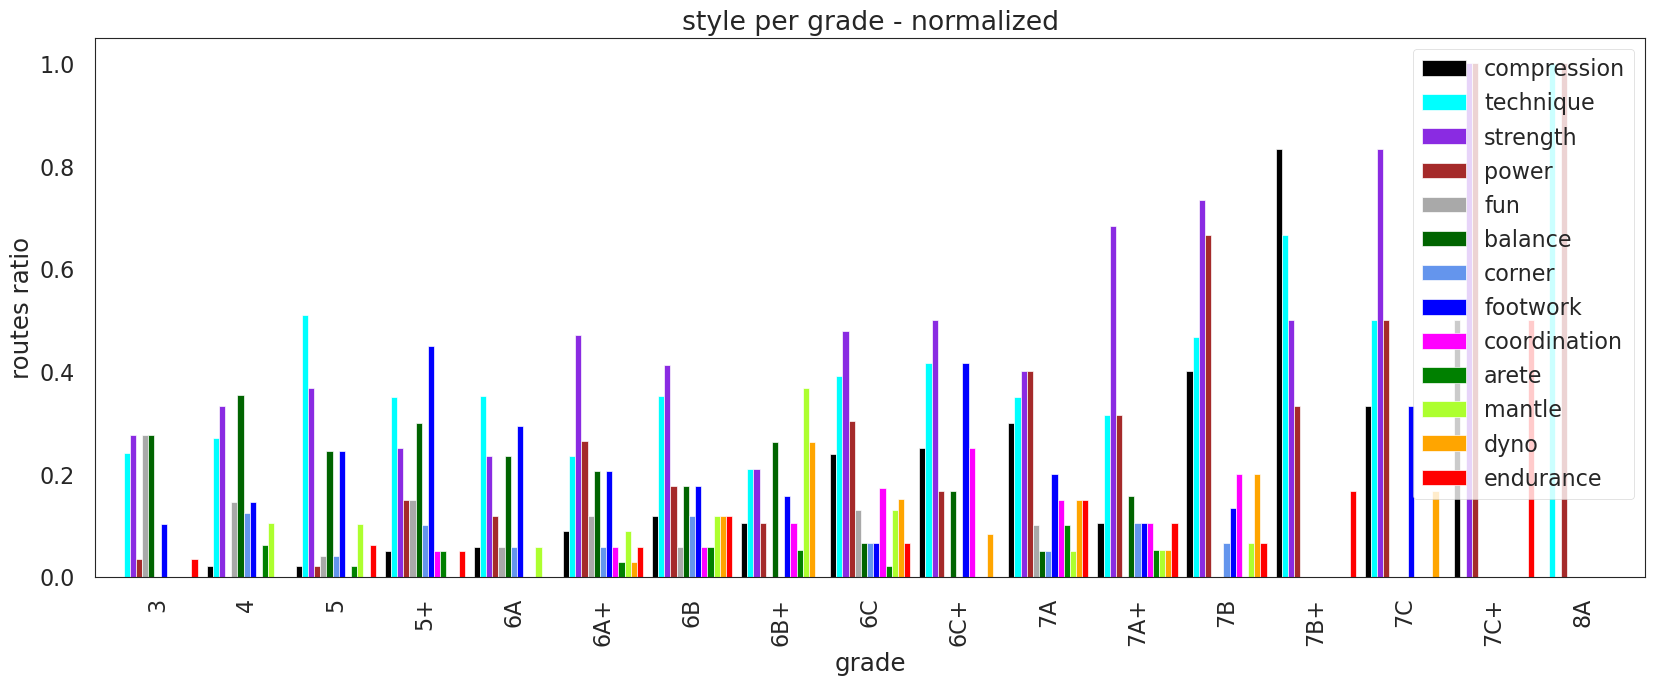

In [30]:
ax = df_grade_style.plot(x="grade", y=list(styles.values()), color=my_colors,
                       kind="bar",figsize=(20,7), width=0.9, title='style per grade - normalized')

ax.set_ylabel("routes ratio")

plt.savefig(f'{date}_style_per_grade_normalized.png')

In [31]:
df_all_routes

section grade grade_gym    color name                  holdtypes  \
0        Karma    7A   SCHWARZ    pink   NaN  crimps, pinches & slopers   
1        Karma    6C      LILA   black   NaN           slopers & crimps   
2        Karma    6A      BLAU    blue   NaN             jugs & pinches   
3        Karma     4      GELB  orange   NaN                     crimps   
4        Karma    5+      GRÜN  yellow   NaN                    slopers   
..         ...   ...       ...      ...  ...                        ...   
355  Backboard     3     WEISS     red   NaN                       jugs   
356  Backboard     5      GRÜN   black   NaN           slopers & crimps   
357    Tsunami    6B      BLAU   green   NaN                    slopers   
358    Tsunami   6A+      BLAU  orange   NaN           slopers & crimps   
359    Tsunami     3     WEISS  violet   NaN                    slopers   

              styles          time  \
0    ['💎', '🔬', '💪']    3 days ago   
1         ['💣', '💎']    3 days ago   
2         ['🤸', '💣']    3 days ago   
3         ['🧘', '💪']    3 days ago   
4         ['🧘', '💢']    3 days ago   
..               ...           ...   
355       ['💪', '🔬']  4 months ago   
356  ['🧘', '💃', '🔬']  4 months ago   
357            ['💎']  4 months ago   
358       ['🧘', '💣']  4 months ago   
359            ['🧘']  4 months ago   

                                                  href  nclimbs  ...  power  \
0    /route/oPyelLHG1UTKGwdDHcqJ1OIzt383~1663690212790      2.0  ...  False   
1    /route/oPyelLHG1UTKGwdDHcqJ1OIzt383~1663690057778     15.0  ...   True   
2    /route/oPyelLHG1UTKGwdDHcqJ1OIzt383~1663689956983     63.0  ...   True   
3    /route/oPyelLHG1UTKGwdDHcqJ1OIzt383~1663689818869      8.0  ...  False   
4    /route/oPyelLHG1UTKGwdDHcqJ1OIzt383~1663689750330     11.0  ...  False   
..                                                 ...      ...  ...    ...   
355  /route/jzquGG3GoYgvvQzFrKXnzvecLwm2~1653492344439     12.0  ...  False   
356  /route/jzquGG3GoYgvvQzFrKXnzvecLwm2~1653054732736    237.0  ...  False   
357  /route/jzquGG3GoYgvvQzFrKXnzvecLwm2~1653054676333    102.0  ...  False   
358  /route/jzquGG3GoYgvvQzFrKXnzvecLwm2~1653054221353     59.0  ...   True   
359  /route/jzquGG3GoYgvvQzFrKXnzvecLwm2~1653054177046     41.0  ...  False   

       fun  balance  corner  footwork  coordination  arete  mantle   dyno  \
0    False    False   False     False         False  False   False  False   
1    False    False   False     False         False  False   False  False   
2     True    False   False     False         False  False   False  False   
3    False     True   False     False         False  False   False  False   
4    False     True    True     False         False  False   False  False   
..     ...      ...     ...       ...           ...    ...     ...    ...   
355  False    False   False     False         False  False   False  False   
356  False     True   False      True         False  False   False  False   
357  False    False   False     False         False  False   False  False   
358  False     True   False     False         False  False   False  False   
359  False     True   False     False         False  False   False  False   

     endurance  
0        False  
1        False  
2        False  
3        False  
4        False  
..         ...  
355      False  
356      False  
357      False  
358      False  
359      False  

[360 rows x 29 columns]

#### More soups:

In [32]:
# user_url = 'https://beta7.app/user/bellonet'
# user_page = requests.get(user_url)
# soup_user = BeautifulSoup(user_page.text, 'html.parser')

### Set route plot style params

In [33]:
attempts = ['⚡', '🥈', '👊', '❓', '✔️']
attempts
#'\U0001f948' second place

['⚡', '🥈', '👊', '❓', '✔️']

In [34]:
## NOT USED - CURRENTLY NO HEIGHT AS HUE
# ## our min height - 158, max - 199  (starting a bit before min to not have white)
# minh = 156
# rang = 44

# cmap_discr = sns.color_palette("vlag", as_cmap=True)(np.linspace(0, 1, rang)) #red to blue
# cmap_discr = sns.color_palette("Blues", as_cmap=True)(np.linspace(0, 1, rang))

# height_colors = {i+minh:c for i,c in enumerate(cmap_discr)}
# height_colors[0] = np.array([0.5, 0.5, 0.5, 1.])

In [35]:
attempt_colors_hex = ['#009e73', '#f0e442', '#CC79A7', '#a39f9e', '#080808']

attempt_colors = {'⚡':attempt_colors_hex[0],
                  '🥈':attempt_colors_hex[1],
                  '👊':attempt_colors_hex[2],
                  '❓':attempt_colors_hex[3],
                  '✔️':attempt_colors_hex[4]}

# attempt_markers = {'⚡':'$⚡$',
#                   '🥈':'$🥈$',
#                   '👊':'$👊$',
#                   '❓':'$❓$',
#                   '✔️':'$✔️$'}

### Plot multiple routes

In [36]:
# # Choose routes to plot:
df_routes_to_plot = df_all_routes[(df_all_routes.grade>'6') & (df_all_routes.nclimbs>10)]
# hrefs_routes_to_plot = df_routes_to_plot["href"].to_list()

In [37]:
# Get routes html
#routes_page = [requests.get(base_url + r) for r in hrefs_routes_to_plot]

In [38]:
routes_dir = f'{date}_routes' 
# os.makedirs(routes_dir)

In [39]:
## Save each route page to txt:

# for ii,p in enumerate(routes_page):
    
#     ## get the df index of the route:
#     df_idx = df_routes_to_plot[df_routes_to_plot.href==hrefs_routes_to_plot[ii]].index[0]
    
#     with open(os.path.join(routes_dir, f'{df_idx}.txt'), 'w') as f:
#         f.write(p.text)

In [40]:
df_routes_to_plot = df_routes_to_plot.sort_values(by=["grade"])

df = pd.DataFrame()

for i in df_routes_to_plot.index:

    with open(os.path.join(routes_dir, f'{i}.txt'), 'r') as f:
        page = f.read()

    # entire page text:
    soup_route = BeautifulSoup(page)

    # Get route name - if exists
    try:
        route_name = soup_route.select_one('.route-name').text
    except:
        route_name = 'XXX'
        
    route_sector = soup_route.select_one('.sector').text

    # Get route level: 
    route_level = soup_route.select_one('.fb').text.split('/')

    # Get hold color:
    hold_color = [c.text.strip() for c in soup_route.select('.color') if c.text.strip()!=''][0]
    hold_color 
    if hold_color=='forest':
        hold_color = '#014421'
    elif hold_color in ['lemon','yellow']:
        hold_color = '#FFEA00'
    elif hold_color=='cornflower':
        hold_color='#9aceeb'
    #hold_color = soup_route.find('title').text.split(' ')[0]

    # List of climbers - full text per climber
    route_senders = [t for t in soup_route.select(".climb-container") 
             if "<span>made a beta request</span>" not in str(t)]
    
    # Their height
    route_heights = [int(s.select_one(".height").text[:-2]) if s.select_one(".height") else np.nan 
             for s in route_senders]

    # Their level
    route_levels = [s.select_one(".level").text[1:] if s.select_one(".level") else None 
         for s in route_senders]

    # Their number of attemps
    route_sendtype = [s.select_one(".sending-type").text if s.select_one(".sending-type") else '❓' 
              for s in route_senders]

    # Create the df
    df_route = pd.DataFrame({"height":route_heights, "levels":route_levels, 'sendtype':route_sendtype})
    df_route['idx'] = i
    df_route['name'] = route_name
    df_route['sector'] = route_sector
    df_route['level'] = route_level[0]
    df_route['gym_level'] = route_level[1]
    df_route['hold_color'] = hold_color
    
    df = pd.concat([df, df_route])

df = df.reset_index(drop=True)
df.shape

(5896, 9)

In [41]:
df.sendtype.unique()

array(['👊', '⚡', '🥈', '❓', '✔️', '🎫'], dtype=object)

In [42]:
df = df.drop(df[df.sendtype == '🎫'].index)

df.shape, df.sendtype.unique()

((5894, 9), array(['👊', '⚡', '🥈', '❓', '✔️'], dtype=object))

In [43]:
df = df.reset_index(drop=True)

In [44]:
print(df.groupby(['level']).agg({'height':["mean","median","min","max"]}).astype(int).sort_values(by=['level']).to_html(col_space=70))

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th style="min-width: 70px;"></th>
      <th colspan="4" halign="left">height</th>
    </tr>
    <tr>
      <th style="min-width: 70px;"></th>
      <th>mean</th>
      <th>median</th>
      <th>min</th>
      <th>max</th>
    </tr>
    <tr>
      <th>level</th>
      <th style="min-width: 70px;"></th>
      <th style="min-width: 70px;"></th>
      <th style="min-width: 70px;"></th>
      <th style="min-width: 70px;"></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>6A</th>
      <td>176</td>
      <td>177</td>
      <td>157</td>
      <td>199</td>
    </tr>
    <tr>
      <th>6A+</th>
      <td>176</td>
      <td>177</td>
      <td>151</td>
      <td>199</td>
    </tr>
    <tr>
      <th>6B</th>
      <td>176</td>
      <td>177</td>
      <td>151</td>
      <td>199</td>
    </tr>
    <tr>
      <th>6B+</th>
      <td>178</td>
      <td>179</td>
      <td>158</td>
      <td>199</td>
    </tr>
    <tr>
      <th>6C</th>

In [50]:
#df[df.idx==17]

#### X attempts, Y height, Hue sender grade

In [ ]:
rcParams['ytick.major.pad']='0'

In [143]:
def plot_xAtt_yHei_hueLev(gym_grade):
    
    rcParams['xtick.major.pad']='4'
    
    df_plot = df[df.gym_level==gym_grade]

    idxs = df_plot.idx.unique()

    nrows,ncols = len(idxs)//3,3

    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols,5*nrows))

    for i in range(nrows):
            for j in range(ncols):

                df_route = df_plot[df_plot.idx == idxs[i*ncols+j]]
                df_route = df_route.sort_values(by=["levels"])

                sns.swarmplot(data=df_route, x=df_route.sendtype, y=df_route.height, order=attempts, 
                              hue=df_route.levels, palette=grade_colors, ax=axes[i,j], size=6)

                axes[i,j].set_xticklabels(attempts, fontsize=20, fontproperties={'family':'Noto Emoji', 'weight':'bold'})
                axes[i,j].legend(fontsize=10, numpoints=1.5)            
                axes[i,j].set_title(f'{df_route.name.iat[0]} - {df_route.level.iat[0]} - {df_route.sector.iat[0]}', 
                                 color=df_route.hold_color.iat[0], fontsize=13)
                axes[i,j].set_xlabel('')
                axes[i,j].set_ylabel('')
                axes[i,j].grid(color='#f6f6f6', linestyle='-', linewidth=2, axis='y')
                sns.despine(left=True)

    plt.subplots_adjust(hspace=0.4, wspace=0.3)

    plt.savefig(f'{date}_xAttempts_yHeight_hueLevel_{gym_grade}.png')

/home/ella/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_8086/3863705767.py:33: UserWarning: Glyph 108 (l) missing from current font.
  plt.savefig(f'{date}_xAttempts_yHeight_hueLevel_{gym_grade}.png')
/tmp/ipykernel_8086/3863705767.py:33: UserWarning: Glyph 112 (p) missing from current font.
  plt.savefig(f'{date}_xAttempts_yHeight_hueLevel_{gym_grade}.png')
/home/ella/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ella/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


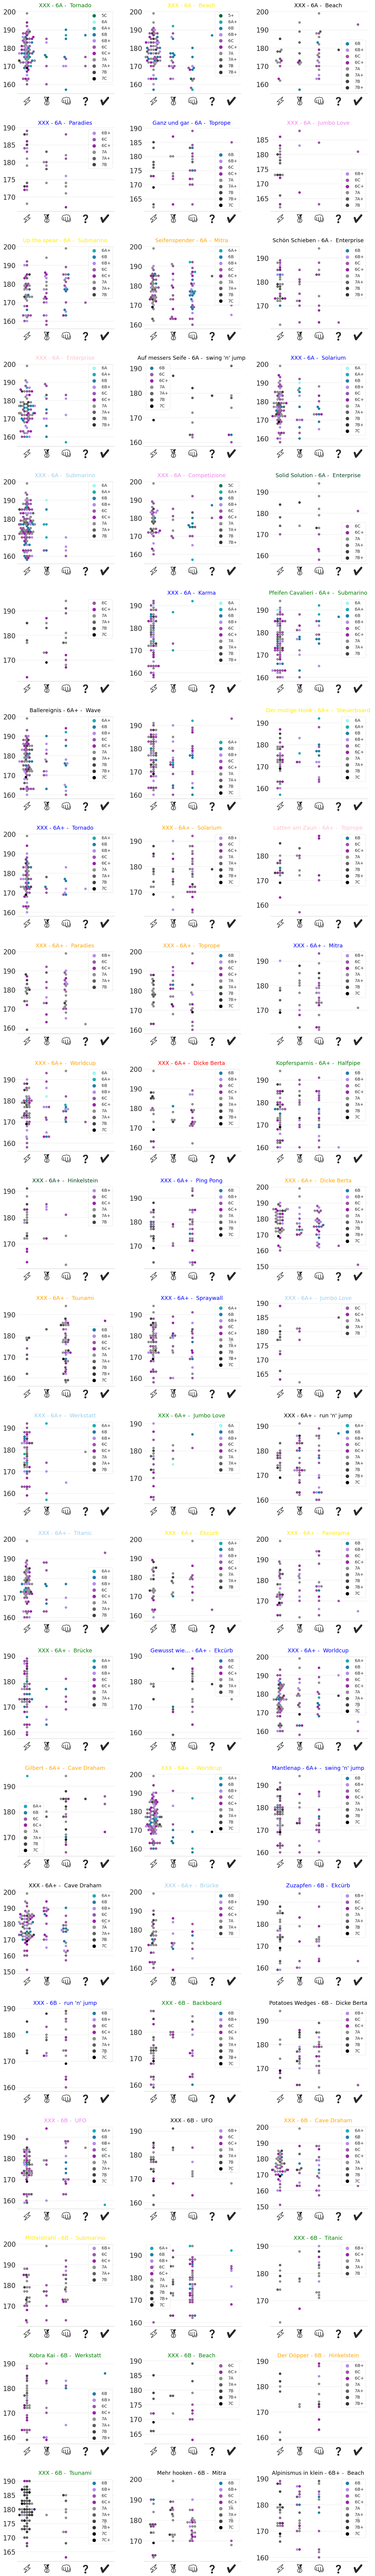

In [144]:
plot_xAtt_yHei_hueLev('BLAU')

/tmp/ipykernel_8086/3863705767.py:33: UserWarning: Glyph 108 (l) missing from current font.
  plt.savefig(f'{date}_xAttempts_yHeight_hueLevel_{gym_grade}.png')
/tmp/ipykernel_8086/3863705767.py:33: UserWarning: Glyph 112 (p) missing from current font.
  plt.savefig(f'{date}_xAttempts_yHeight_hueLevel_{gym_grade}.png')
/home/ella/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ella/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


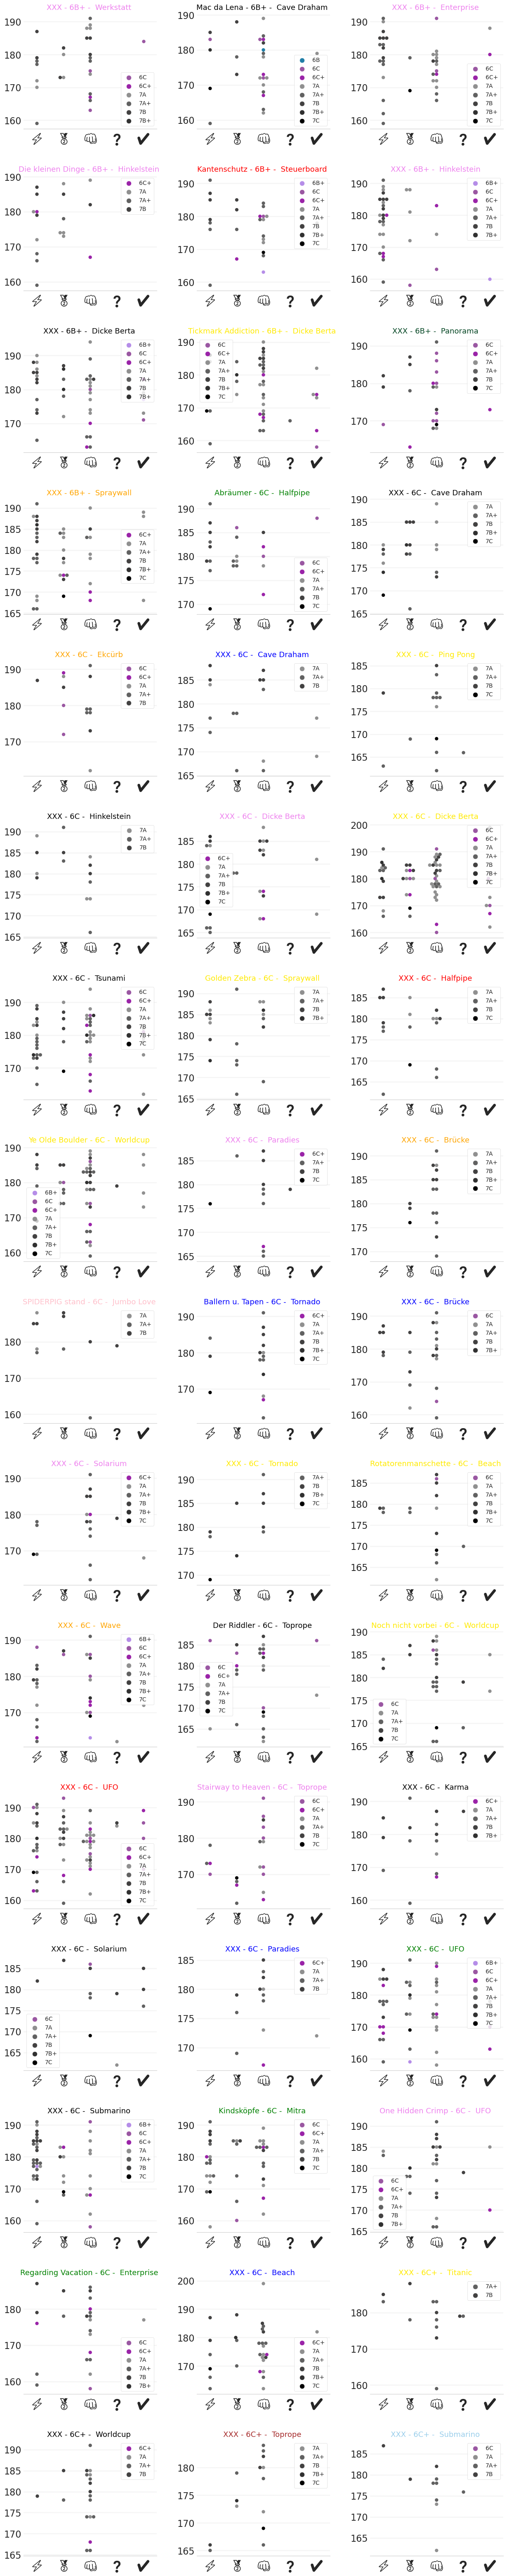

In [145]:
plot_xAtt_yHei_hueLev('LILA')

/tmp/ipykernel_8086/3863705767.py:33: UserWarning: Glyph 108 (l) missing from current font.
  plt.savefig(f'{date}_xAttempts_yHeight_hueLevel_{gym_grade}.png')
/tmp/ipykernel_8086/3863705767.py:33: UserWarning: Glyph 112 (p) missing from current font.
  plt.savefig(f'{date}_xAttempts_yHeight_hueLevel_{gym_grade}.png')
/home/ella/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ella/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


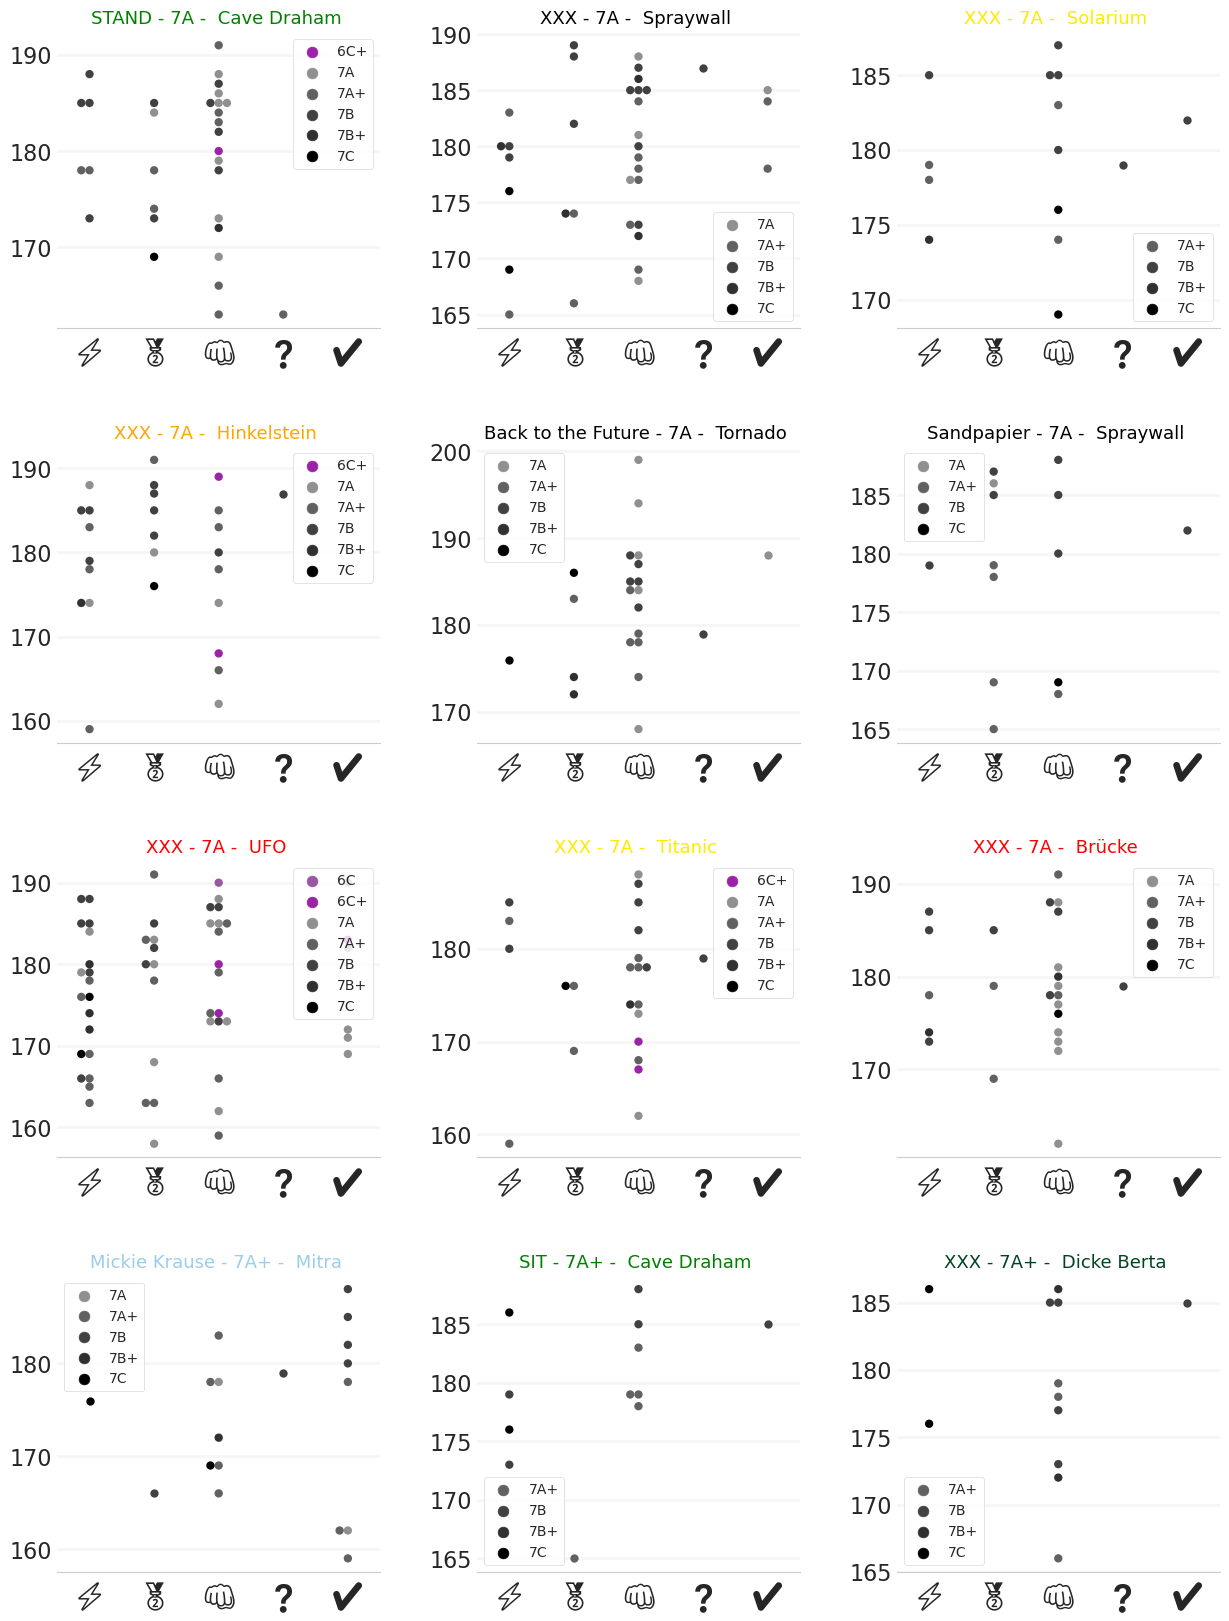

In [146]:
plot_xAtt_yHei_hueLev('SCHWARZ')

#### X height , Y attempts, Hue sender grade

In [147]:
def plot_xHei_yAtt_hueLev(gym_grade):
    
    rcParams['xtick.major.pad']='4'
    
    df_plot = df[df.gym_level==gym_grade]

    idxs = df_plot.idx.unique()

    nrows,ncols = len(idxs)//3,3

    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols,5*nrows))

    for i in range(nrows):
            for j in range(ncols):

                df_route = df_plot[df_plot.idx == idxs[i*ncols+j]]
                df_route = df_route.sort_values(by=["levels"])
                
                df_route.sendtype = pd.Categorical(df_route.sendtype, 
                          categories=attempts,
                          ordered=True)

                sns.scatterplot(data=df_route, x=df_route.height, y=df_route.sendtype, 
                              hue=df_route.levels, palette=grade_colors, ax=axes[i,j], s=80)

                axes[i,j].set_yticks(attempts)
                axes[i,j].set_yticklabels(attempts, fontsize=25, 
                                       fontproperties={'family':'Noto Emoji', 'weight':'bold'})

                ## Needed because of a bug of an extra legend item
                leg = axes[i,j].get_legend_handles_labels()
                axes[i,j].legend(leg[0][:-1],leg[1][:-1], fontsize=10, numpoints=1.5)            
                axes[i,j].set_title(f'{df_route.name.iat[0]} - {df_route.level.iat[0]} - {df_route.sector.iat[0]}', 
                                 color=df_route.hold_color.iat[0], fontsize=13) 
                axes[i,j].set_xlabel('')
                axes[i,j].set_ylabel('')
                sns.despine(left=True, bottom=True)
                axes[i,j].legend([],[], frameon=False)
                axes[i,j].grid(False)
                axes[i,j].grid(color='#f6f6f6', linestyle='-', linewidth=2, axis='x')

    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    plt.savefig(f'{date}_xHeight_yAttemps_hueLevel_{gym_grade}.png')

/tmp/ipykernel_8086/867041833.py:43: UserWarning: Glyph 108 (l) missing from current font.
  plt.savefig(f'{date}_xHeight_yAttemps_hueLevel_{gym_grade}.png')
/tmp/ipykernel_8086/867041833.py:43: UserWarning: Glyph 112 (p) missing from current font.
  plt.savefig(f'{date}_xHeight_yAttemps_hueLevel_{gym_grade}.png')
/tmp/ipykernel_8086/867041833.py:43: UserWarning: Glyph 108 (l) missing from current font.
  plt.savefig(f'{date}_xHeight_yAttemps_hueLevel_{gym_grade}.png')
/tmp/ipykernel_8086/867041833.py:43: UserWarning: Glyph 112 (p) missing from current font.
  plt.savefig(f'{date}_xHeight_yAttemps_hueLevel_{gym_grade}.png')
/tmp/ipykernel_8086/867041833.py:43: UserWarning: Glyph 108 (l) missing from current font.
  plt.savefig(f'{date}_xHeight_yAttemps_hueLevel_{gym_grade}.png')
/tmp/ipykernel_8086/867041833.py:43: UserWarning: Glyph 112 (p) missing from current font.
  plt.savefig(f'{date}_xHeight_yAttemps_hueLevel_{gym_grade}.png')
/home/ella/miniconda3/lib/python3.9/site-packages/IP

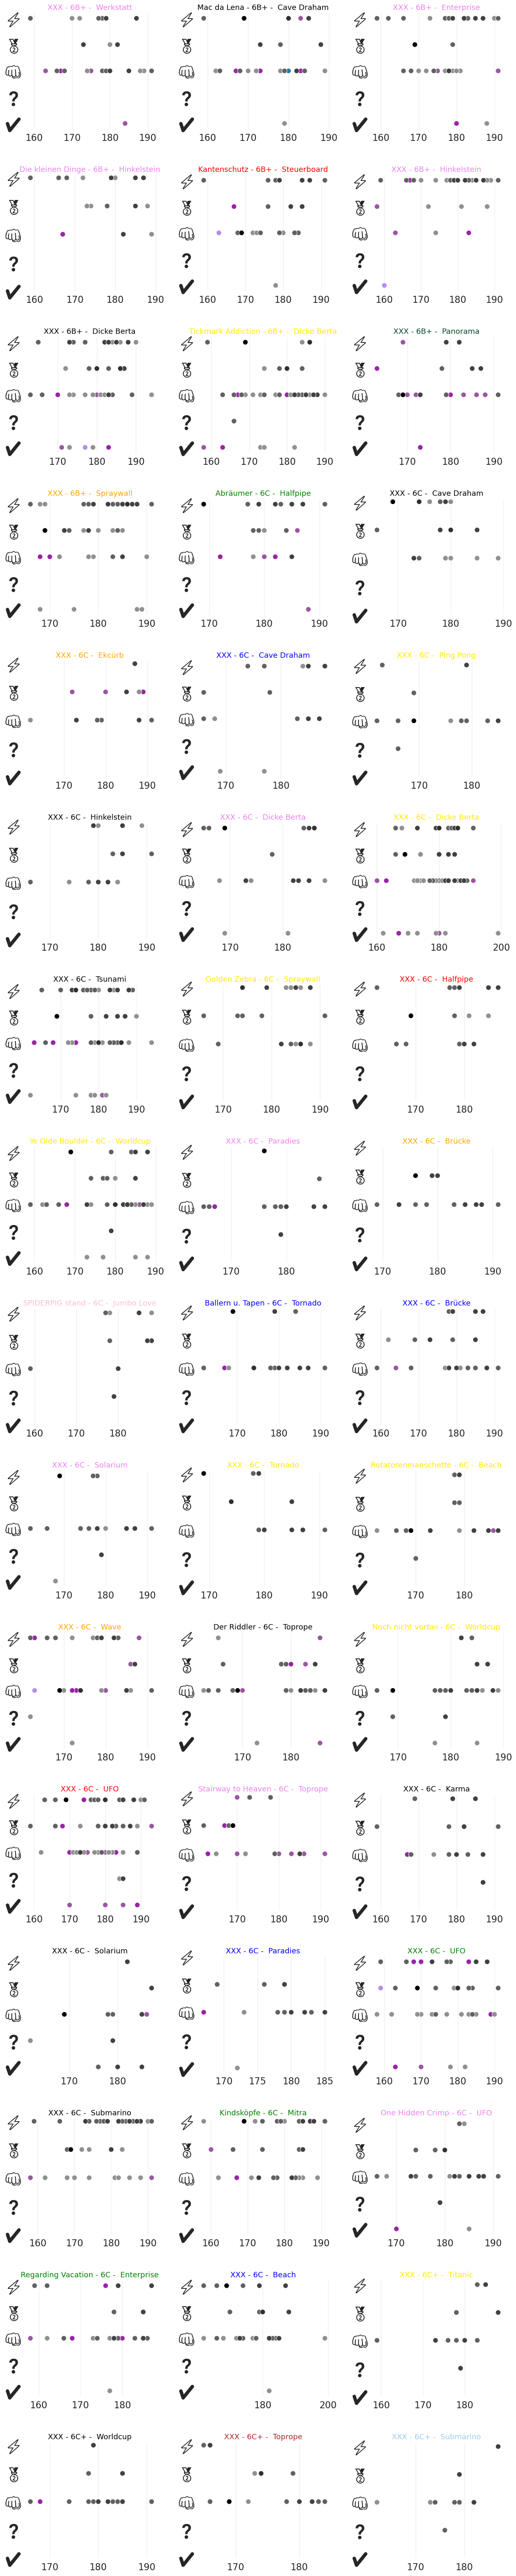

In [148]:
plot_xHei_yAtt_hueLev('LILA')

#### Hue height

In [57]:
## CREATES MARKERS THAT ARE TOO SMALL
# nrows,ncols = len(routes_hrefs)//3,3

# #fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols,5*nrows))

# fig = plt.figure(constrained_layout=True, figsize=(5*ncols,6*nrows))

# ## create nrows subfigs
# subfigs = fig.subfigures(nrows=len(routes_hrefs)//3, ncols=1, hspace=0.1)

# for i,subfig in enumerate(subfigs):
        
#         subfig.suptitle(sectors[i], fontsize=20)
        
#         # create 1xncols subplots per subfig
#         axs = subfig.subplots(nrows=1, ncols=ncols)
#         for j, ax in enumerate(axs):

#             df_route = df[df.idx == i*ncols+j]
#             df_route = df_route.sort_values(by=["levels"])
#             df_route['height'] = df_route['height'].fillna(0)
#             df_route = df_route.astype({"height": int})

#             sns.swarmplot(data=df_route, x=df_route.sendtype, y=df_route.levels, order=attempts, 
#                           hue=df_route.height, palette=height_colors, ax=axs[j], size=6, marker="*")

#             axs[j].set_xticklabels(attempts, fontsize=30, fontproperties={'family':'Noto Emoji', 'weight':'bold'})
            
#             legend_elements = [Line2D([0], [0], marker='o', color=height_colors[0], label='-'),
#                                Line2D([0], [0], marker='o', color='w', label='Scatter', markersize=15)]
            
            
#             axs[j].legend(handles=legend_elements, fontsize=10, numpoints=1.5)            
#             axs[j].set_title(f'{df_route.name.iat[0]} - {df_route.level.iat[0]}', 
#                              color=df_route.hold_color.iat[0])
#             axs[j].set_xlabel('')
#             axs[j].set_ylabel('')
#             sns.despine(left=True)

In [ ]:
## CREATES MARKERS THAT ARE TOO SMALL
# nrows,ncols = len(routes_hrefs)//3,3

# #fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols,5*nrows))

# fig = plt.figure(constrained_layout=True, figsize=(5*ncols,5*nrows))

# ## create nrows subfigs
# subfigs = fig.subfigures(nrows=len(routes_hrefs)//3, ncols=1, hspace=0.1)

# for i,subfig in enumerate(subfigs):
        
#         subfig.suptitle(sectors[i], fontsize=20)
        
#         # create 1xncols subplots per subfig
#         axs = subfig.subplots(nrows=1, ncols=ncols)
#         for j, ax in enumerate(axs):

#             df_route = df[df.idx == i*ncols+j]
#             df_route = df_route.sort_values(by=["levels"])
#             df_route.sendtype = pd.Categorical(df_route.sendtype, 
#                       categories=attempts,
#                       ordered=True)

#             sns.scatterplot(data=df_route, x=df_route.levels, y=df_route.sendtype, 
#                           hue=df_route.height, palette=height_colors, ax=axs[j], s=80)

#             axs[j].set_yticks(attempts)
#             axs[j].set_yticklabels(attempts, fontsize=25, fontproperties={'family':'Noto Emoji', 'weight':'bold'})

#             ## Needed because of a bug of an extra legend item
#             leg = axs[j].get_legend_handles_labels()
#             axs[j].legend(leg[0][:-1],leg[1][:-1], fontsize=10, numpoints=1.5)            
#             axs[j].set_title(f'{df_route.name.iat[0]} - {df_route.level.iat[0]}', 
#                              color=df_route.hold_color.iat[0])
#             axs[j].set_xlabel('')
#             axs[j].set_ylabel('')
#             #sns.despine(left=True)

#### X sender grade, Y height, Hue attempts

In [ ]:
### DOESNT LOOK GOOD
# from matplotlib.path import Path
# from matplotlib.textpath import TextToPath
# from matplotlib.font_manager import FontProperties

# fp = FontProperties(family='Noto Emoji', weight='bold')

# def get_marker(symbol):
#     v, codes = TextToPath().get_text_path(fp, symbol)
#     v = np.array(v)
#     mean = np.mean([np.max(v,axis=0), np.min(v, axis=0)], axis=0)
#     return Path(v-mean, codes, closed=False)

In [161]:
def plot_xLev_yHei_hueAtt(gym_grade):
    
    rcParams['xtick.major.pad']='6'
    
    df_plot = df[df.gym_level==gym_grade]

    idxs = df_plot.idx.unique()

    nrows,ncols = len(idxs)//3,3

    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols,5*nrows))

    for i in range(nrows):
            for j in range(ncols):

                df_route = df_plot[df_plot.idx == idxs[i*ncols+j]]
                df_route = df_route.sort_values(by=["levels"])

                sns.scatterplot(data=df_route, x=df_route.levels, y=df_route.height,
                              hue=df_route.sendtype,
                                palette=attempt_colors, ax=axes[i,j], s=50) 

                axes[i,j].xaxis.set_tick_params(labelsize=12)
                axes[i,j].yaxis.set_tick_params(labelsize=12)
                axes[i,j].legend([])            
                axes[i,j].set_title(f'{df_route.name.iat[0]} - {df_route.level.iat[0]} - {df_route.sector.iat[0]}', 
                                 color=df_route.hold_color.iat[0], fontsize=13) 
                axes[i,j].set_xlabel('')
                axes[i,j].set_ylabel('')
                axes[i,j].grid(color='#f6f6f6', linestyle='-', linewidth=2)
                sns.despine(left=True)
                
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    plt.savefig(f'{date}_xLevel_yHeight_hueAttem_{gym_grade}.png')

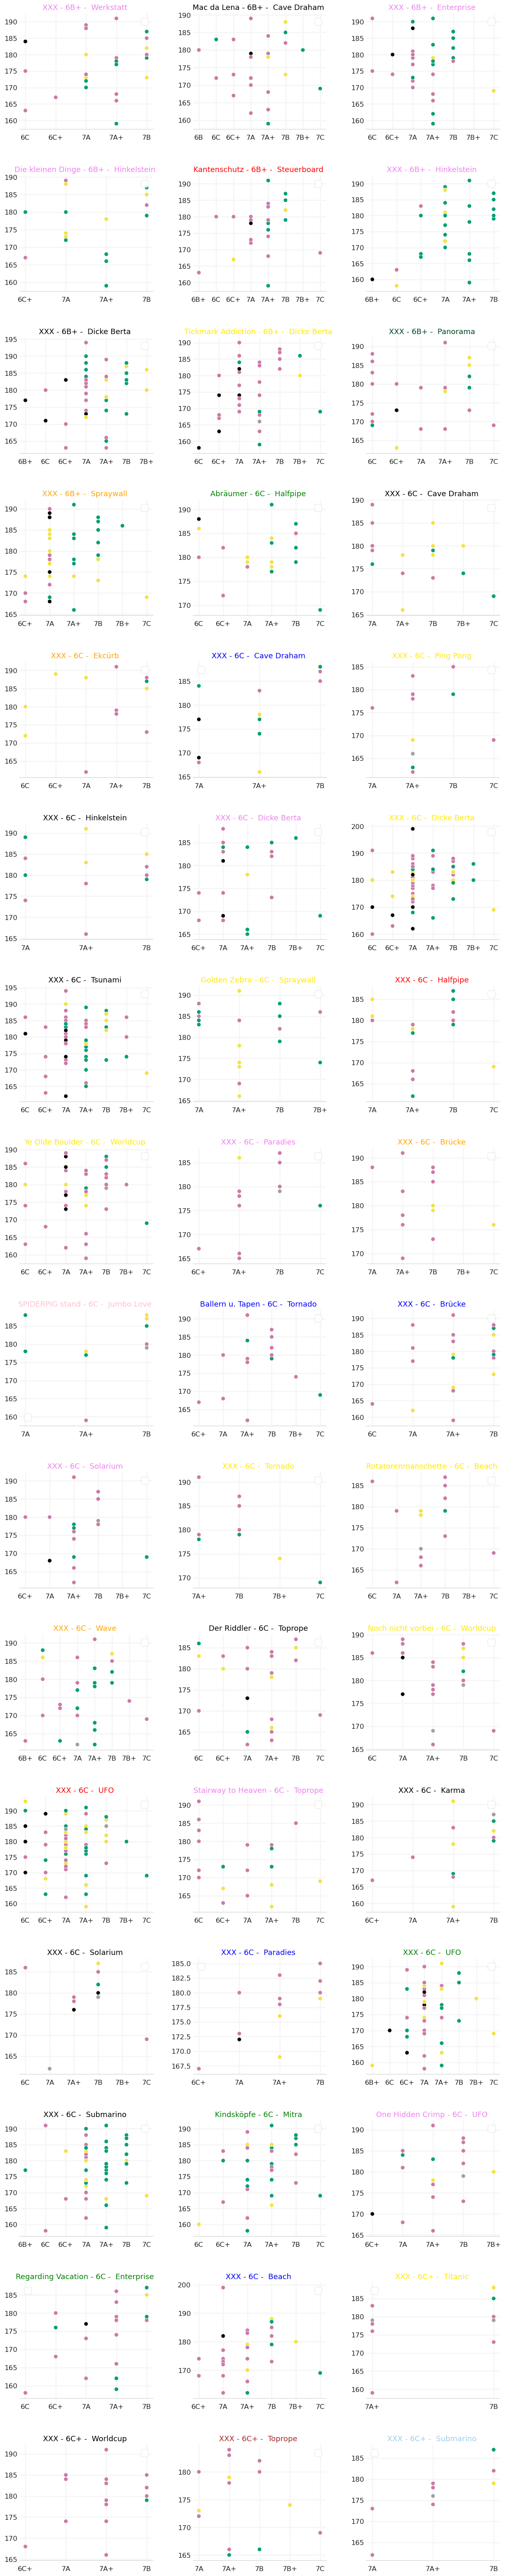

In [162]:
plot_xLev_yHei_hueAtt('LILA')

/tmp/ipykernel_8086/3301438138.py:6: UserWarning: Glyph 108 (l) missing from current font.
  plt.savefig('hueAttempts.png')
/tmp/ipykernel_8086/3301438138.py:6: UserWarning: Glyph 112 (p) missing from current font.
  plt.savefig('hueAttempts.png')
/home/ella/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ella/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


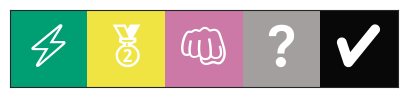

In [60]:
sns.palplot(attempt_colors_hex)
ax = plt.gca()
for i, name in enumerate(attempts):
    ax.text(i-0.35, 0.15, name, c='white', size=30, fontproperties={'family':'Noto Emoji', 'weight':'bold'}) 
    
plt.savefig('hueAttempts.png')

### Heat Maps

In [48]:
## Bin height

bins = range(155,201,5)
height_labels = [f'~{b+2}' for b in bins][:-1]
df['height_binned'] = pd.cut(df['height'], bins, labels=height_labels)

In [213]:
def plot_heatmap(gym_grade, set_axis=True, is_squares=True):
    
    rcParams['xtick.major.pad']='0'

    gym_grade = gym_grade
    df_plot = df[df.gym_level==gym_grade]

    idxs = df_plot.idx.unique()

    nrows,ncols = len(idxs)//3,3

    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols,4*nrows))

    for i in range(nrows):
            for j in range(ncols):

                df_route = df_plot[df_plot.idx == idxs[i*ncols+j]]
            
                lev = pd.Categorical(df_route['levels'], categories=list(grade_colors.keys())[4:-1])
                hei = pd.Categorical(df_route['height_binned'], categories=height_labels)

                confusion_matrix = pd.crosstab(lev, hei, dropna=False) 

                sns.heatmap(data=confusion_matrix, cmap="BuPu", vmin=0, vmax=10, annot=False, 
                            square=is_squares, ax=axes[i,j]) 

                axes[i,j].xaxis.set_tick_params(labelsize=12)
                axes[i,j].yaxis.set_tick_params(labelsize=12)         
                axes[i,j].set_title(f'{df_route.name.iat[0]} - {df_route.level.iat[0]} - {df_route.sector.iat[0]}', 
                                     color=df_route.hold_color.iat[0], fontsize=13)

                axes[i,j].invert_yaxis()
                axes[i,j].set_xlabel('')
                axes[i,j].set_ylabel('')

    plt.subplots_adjust(hspace=0.4, wspace=0.2)
    plt.savefig(f'{date}_heatmap_xLevel_yHeight_{gym_grade}.png')

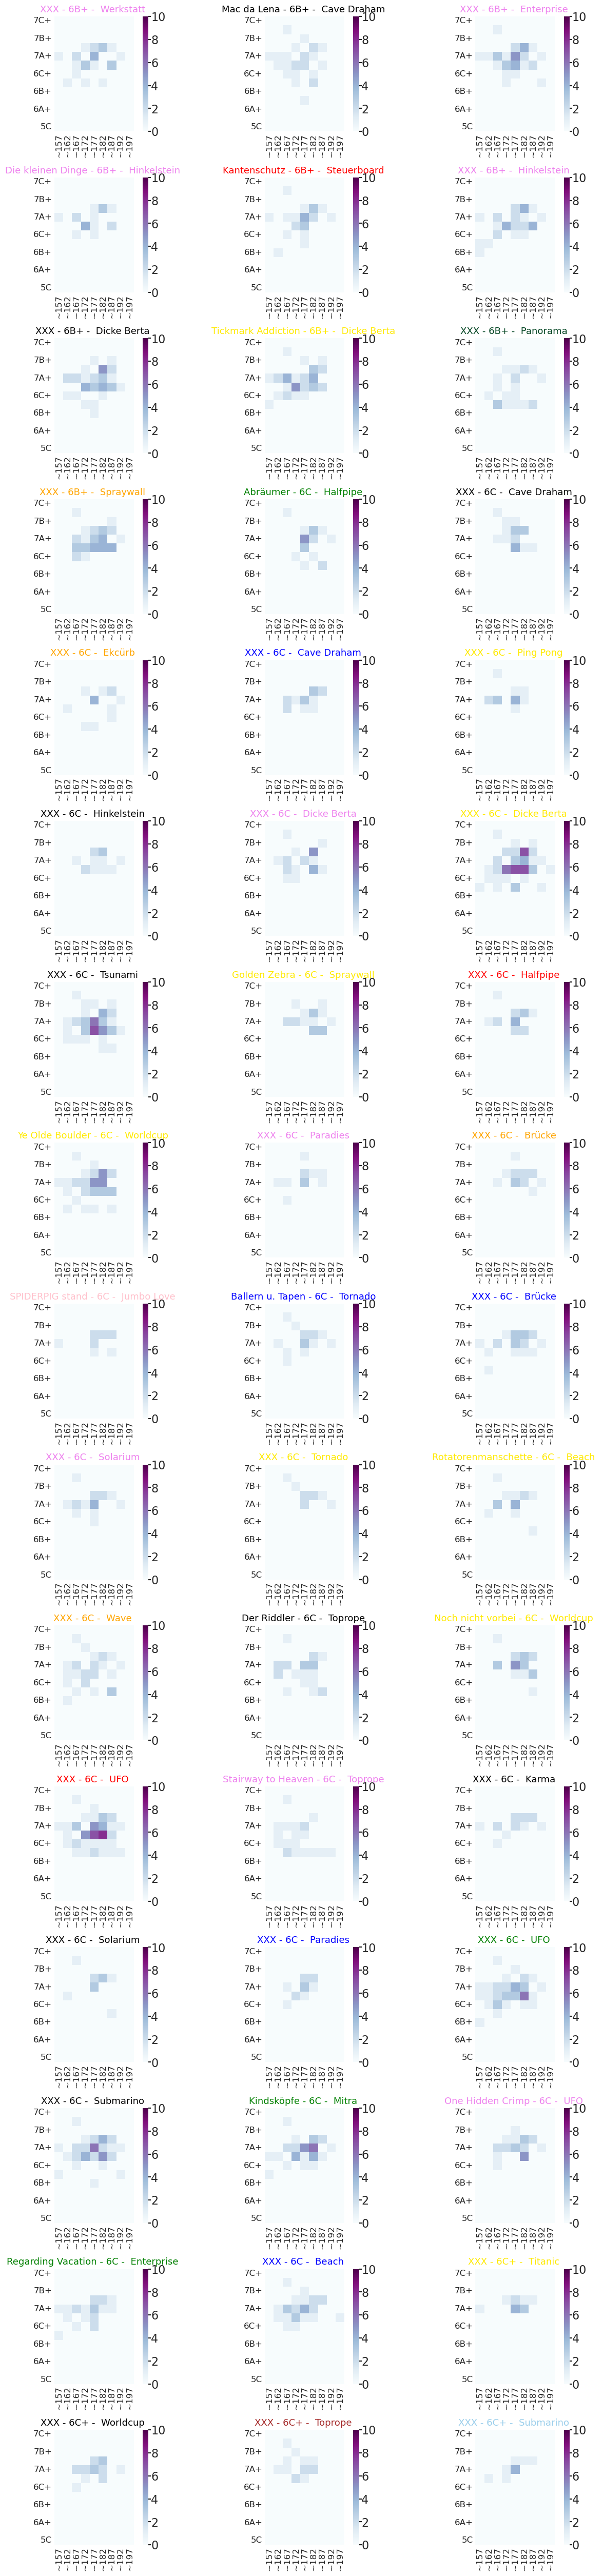

In [214]:
plot_heatmap('LILA')

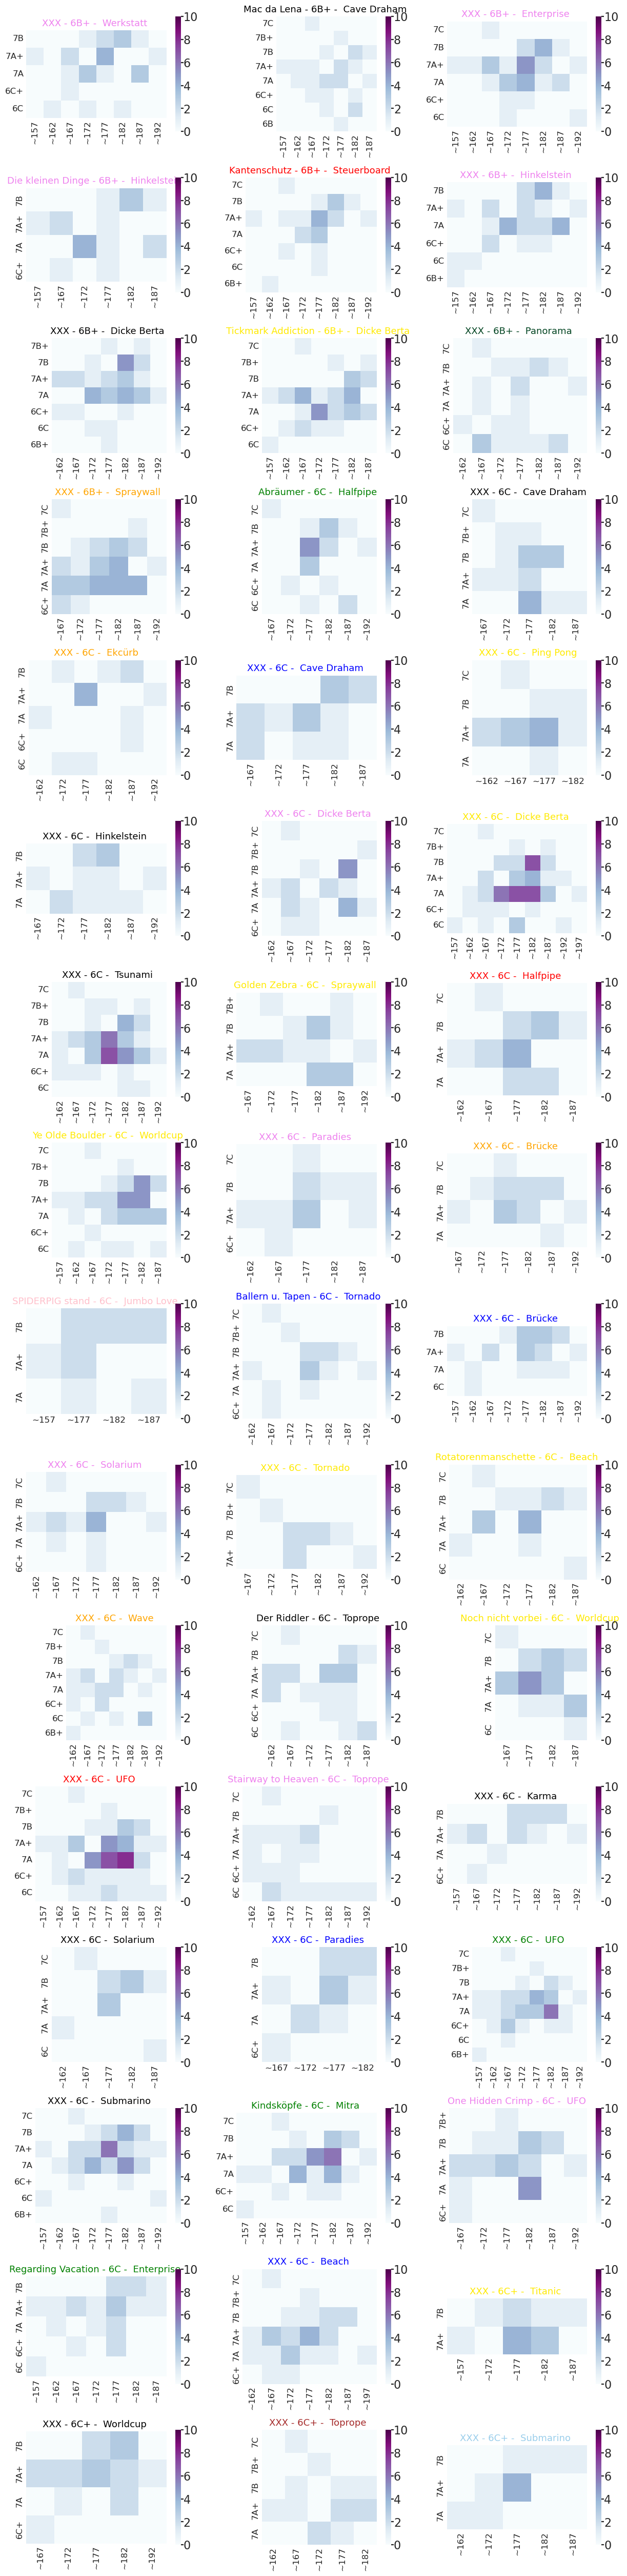

In [211]:
plot_heatmap('LILA', set_axis=False)

### Plot means per grade

In [45]:
df.level.unique()

array(['6A', '6A+', '6B', '6B+', '6C', '6C+', '7A', '7A+'], dtype=object)

In [46]:
# ## plot grade summary:

# rcParams['xtick.major.pad']='0'

# # gym_grade = gym_grade
# # df_plot = df[df.gym_level==gym_grade]

# # idxs = df_plot.idx.unique()

# levels = df.level.unique()

# nrows,ncols = 2,4

# fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols,6*nrows))

# for i in range(nrows):
#         for j in range(ncols):

#             df_grade = df[df.level == levels[i*ncols+j]]

#             lev = pd.Categorical(df_grade['levels'], categories=list(grade_colors.keys())[4:-1])
#             hei = pd.Categorical(df_grade['height_binned'], categories=height_labels)

#             confusion_matrix = pd.crosstab(lev, hei, dropna=False) 

#             sns.heatmap(data=confusion_matrix, cmap="BuPu", annot=False, 
#                         square=True, ax=axes[i,j], cbar_kws={"shrink": .7}) 

#             axes[i,j].xaxis.set_tick_params(labelsize=12)
#             axes[i,j].yaxis.set_tick_params(labelsize=12)         
#             axes[i,j].set_title(f'{df_grade.level.iat[0]}  (n={df_grade.shape[0]})', fontsize=13)

#             axes[i,j].invert_yaxis()
#             axes[i,j].set_xlabel('')
#             axes[i,j].set_ylabel('')

# plt.subplots_adjust(hspace=0.3, wspace=0.3)
# plt.savefig(f'{date}_heatmap_per_levels.png')

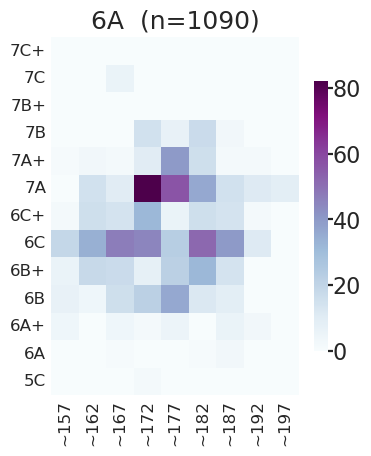

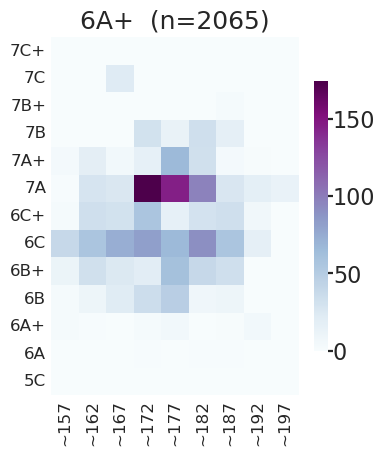

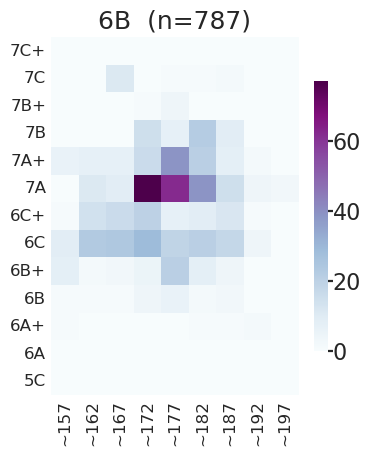

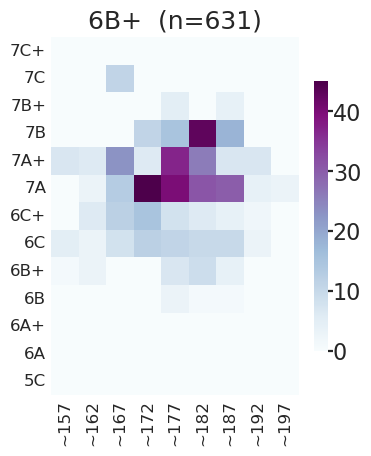

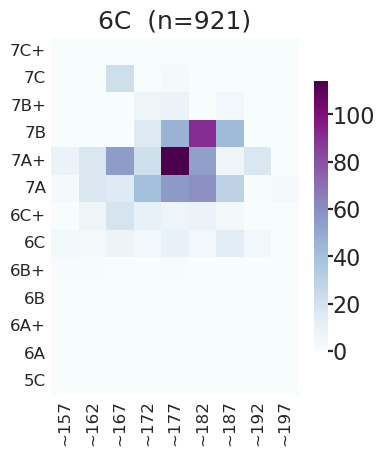

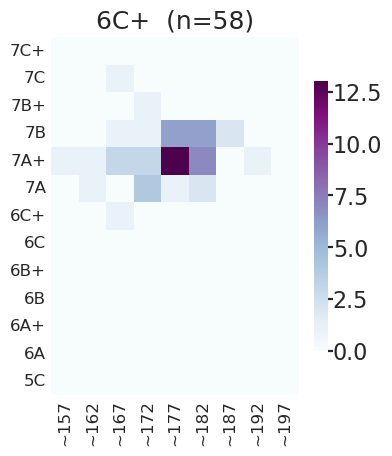

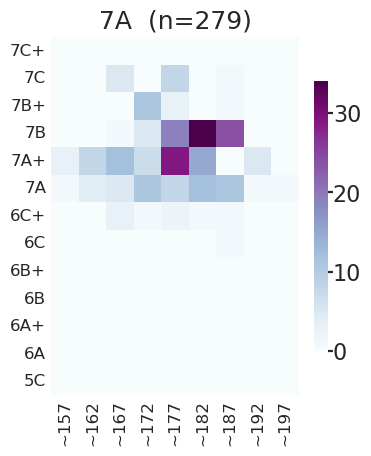

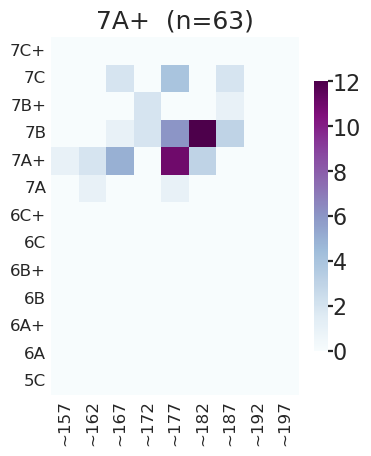

In [254]:
## Individual images
rcParams['xtick.major.pad']='0'

levels = df.level.unique()

for i in range(8):
            
    plt.figure(figsize=(4,5))

    df_grade = df[df.level == levels[i]]

    lev = pd.Categorical(df_grade['levels'], categories=list(grade_colors.keys())[4:-1])
    hei = pd.Categorical(df_grade['height_binned'], categories=height_labels)

    confusion_matrix = pd.crosstab(lev, hei, dropna=False) 
    
    ## not using smoothing as it lowers n by much
    #### np.sum(gaussian_filter(confusion_matrix.astype(float), 0.1).astype(int))

    ax = sns.heatmap(data=confusion_matrix, cmap="BuPu", annot=False, 
                square=True, cbar_kws={"shrink": .7}) 

    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)         
    ax.set_title(f'{df_grade.level.iat[0]}  (n={df_grade.shape[0]})', fontsize=18)

    ax.invert_yaxis()
    ax.set_xlabel('')
    ax.set_ylabel('')

    plt.savefig(f'{date}_heatmap_per_level_{levels[i]}.png')

In [66]:
np.sum(gaussian_filter(confusion_matrix.astype(float), 0.1).astype(int))

59

In [80]:
## Individual images - plotly
rcParams['xtick.major.pad']='0'

levels = df.level.unique()

for i in range(8):

    df_grade = df[df.level == levels[i]]

    lev = pd.Categorical(df_grade['levels'], categories=list(grade_colors.keys())[4:-1])
    hei = pd.Categorical(df_grade['height_binned'], categories=height_labels)

    confusion_matrix = pd.crosstab(lev, hei, dropna=False) 
    
    ## not using smoothing as it lowers n by much
    #### np.sum(gaussian_filter(confusion_matrix.astype(float), 0.1).astype(int))

    fig = px.imshow(confusion_matrix, color_continuous_scale="BuPu", width=300, height=400,
                   )
    fig.update_layout(title_text=f'{df_grade.level.iat[0]}  (n={df_grade.shape[0]})', title_x=0.5)
    fig.update_xaxes(title=None)
    fig.update_yaxes(title=None)
    
    fig.update_traces(hovertemplate='👊')
#     hovertemplate="<br>".join([
#         "ColX: %{x}",
#         "ColY: %{y}",
#         "Col1: %{customdata[0]}",
#         "Col2: %{customdata[1]}",
#         "Col3: %{customdata[2]}",
#     ]))
    
    fig.show()
    fig.write_html("test.html")
#     ax = sns.heatmap(data=confusion_matrix, cmap="BuPu", annot=False, 
#                 square=True, cbar_kws={"shrink": .7}) 

#     ax.xaxis.set_tick_params(labelsize=12)
#     ax.yaxis.set_tick_params(labelsize=12)         
#     ax.set_title(f'{df_grade.level.iat[0]}  (n={df_grade.shape[0]})', fontsize=18)

#     ax.invert_yaxis()
#     ax.set_xlabel('')
#     ax.set_ylabel('')

#     plt.savefig(f'{date}_heatmap_per_level_{levels[i]}.png')